In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import altair as alt

In [2]:
# Source: http://gisdata.scag.ca.gov/Lists/GISData/DispForm.aspx?ID=11
city_boundaries = 'city_boundary_scag_2010.shp'

In [3]:
map_df = gpd.read_file(city_boundaries)

In [4]:
map_df.head()

,CITY,CITY_ID,AREA_,PERIMETER,ACRES,X_CENTER,Y_CENTER,COUNTY,Shape_area,Shape_len,geometry
0,Agoura Hills,394,2.024535e+07,24496.99983,5002.71608,337665.76111,3.780300e+06,Los Angeles,2.024535e+07,24496.999825,POLYGON Z ((341424.5199999996 3778602.37680000...
1,Alhambra,884,1.975647e+07,21039.72920,4881.90980,395239.24428,3.772047e+06,Los Angeles,1.975647e+07,21039.729200,"POLYGON Z ((396360.7253999999 3774564.1252 0, ..."
2,Arcadia,2462,2.875722e+07,40365.69336,7106.03511,404356.76723,3.777520e+06,Los Angeles,2.875722e+07,40365.693363,"POLYGON Z ((405872.8043999998 3782523.3288 0, ..."
3,Artesia,2896,4.203547e+06,12485.76722,1038.71488,400050.85307,3.747997e+06,Los Angeles,4.203547e+06,12485.767218,"POLYGON Z ((400592.3557000002 3749412.8189 0, ..."
4,Avalon,3274,7.124962e+06,16464.08288,1760.60939,376269.98352,3.689309e+06,Los Angeles,7.124962e+06,16464.082878,POLYGON Z ((376613.6288000001 3687771.99609999...


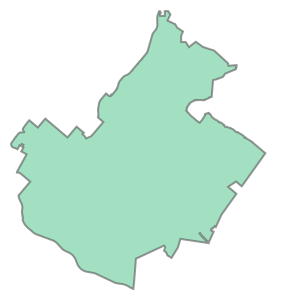

In [5]:
map_df.geometry[map_df.CITY == 'Irvine'].iloc[0]

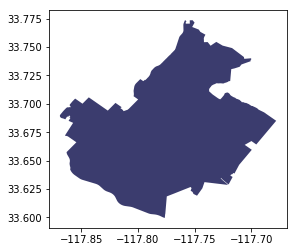

In [6]:
irvine = map_df[map_df.CITY == 'Irvine']
irvine_map = irvine.to_crs(epsg=4326)  # Converting shapefile coordinates to lat/long: https://stackoverflow.com/questions/47203938/convert-the-coordinates-of-a-shapefile-in-geopandas
irvine_map.plot(color='#3B3C6E')

---

In [ ]:
# Useful tutorial: https://www.datacamp.com/community/tutorials/geospatial-data-python

In [7]:
theft_addresses = pd.read_csv('irvine_theft_lat_lon')

In [8]:
theft_addresses.head()

,DR,Date,Year,Block,Street,Address,Lat,Lon
0,1100325,2011-01-07,2011,100,ROCKVIEW,"100 ROCKVIEW, Irvine, CA",33.652512,-117.819850
1,1102024,2011-02-10,2011,900,SOMERVILLE,"900 SOMERVILLE, Irvine, CA",33.728637,-117.760803
2,1105426,2011-04-19,2011,400,ORANGE BLOSSOM,"400 ORANGE BLOSSOM, Irvine, CA",33.672377,-117.774126
3,1107360,2011-05-26,2011,0,WEATHERSFIELD,"0 WEATHERSFIELD, Irvine, CA",33.729731,-117.778779
4,1109744,2011-06-26,2011,0,EL CAJON,"0 EL CAJON, Irvine, CA",33.734975,-117.769954


In [9]:
len(theft_addresses)

967

In [10]:
theft_addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 8 columns):
DR         967 non-null int64
Date       967 non-null object
Year       967 non-null int64
Block      967 non-null int64
Street     967 non-null object
Address    967 non-null object
Lat        967 non-null float64
Lon        967 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 60.5+ KB


In [11]:
# Combining lat/lon values for geopandas manipulation
combined = []
for i, row in theft_addresses.iterrows():
    latlon = []
    latlon.append(round(row.Lon, 6))  # Rounding off to 6th decimal to avoid issues w/ numpy processing (alters numbers slightly)
    latlon.append(round(row.Lat, 6))  # Ordered w/ longitute before latitude since that's the order that geopandas processes geo data
    combined.append(latlon)

theft_addresses['Lon_Lat'] = combined

In [12]:
theft_addresses.head()

,DR,Date,Year,Block,Street,Address,Lat,Lon,Lon_Lat
0,1100325,2011-01-07,2011,100,ROCKVIEW,"100 ROCKVIEW, Irvine, CA",33.652512,-117.819850,"[-117.81985, 33.652512]"
1,1102024,2011-02-10,2011,900,SOMERVILLE,"900 SOMERVILLE, Irvine, CA",33.728637,-117.760803,"[-117.760803, 33.728637]"
2,1105426,2011-04-19,2011,400,ORANGE BLOSSOM,"400 ORANGE BLOSSOM, Irvine, CA",33.672377,-117.774126,"[-117.774126, 33.672377]"
3,1107360,2011-05-26,2011,0,WEATHERSFIELD,"0 WEATHERSFIELD, Irvine, CA",33.729731,-117.778779,"[-117.778779, 33.729731]"
4,1109744,2011-06-26,2011,0,EL CAJON,"0 EL CAJON, Irvine, CA",33.734975,-117.769954,"[-117.769954, 33.734975]"


In [13]:
theft_addresses.Lon_Lat = theft_addresses.Lon_Lat.apply(Point)

In [14]:
type(theft_addresses)

pandas.core.frame.DataFrame

Converting df to geodf

In [15]:
theft_addresses = gpd.GeoDataFrame(theft_addresses, geometry='Lon_Lat')

In [16]:
type(theft_addresses)

geopandas.geodataframe.GeoDataFrame

In [17]:
theft_addresses.Date = pd.to_datetime(theft_addresses.Date)
theft_addresses['Year'] = theft_addresses.Date.dt.year
theft_addresses['Month'] = theft_addresses.Date.dt.month_name()

In [18]:
theft_addresses.head()

,DR,Date,Year,Block,Street,Address,Lat,Lon,Lon_Lat,Month
0,1100325,2011-01-07,2011,100,ROCKVIEW,"100 ROCKVIEW, Irvine, CA",33.652512,-117.819850,POINT (-117.81985 33.652512),January
1,1102024,2011-02-10,2011,900,SOMERVILLE,"900 SOMERVILLE, Irvine, CA",33.728637,-117.760803,POINT (-117.760803 33.728637),February
2,1105426,2011-04-19,2011,400,ORANGE BLOSSOM,"400 ORANGE BLOSSOM, Irvine, CA",33.672377,-117.774126,POINT (-117.774126 33.672377),April
3,1107360,2011-05-26,2011,0,WEATHERSFIELD,"0 WEATHERSFIELD, Irvine, CA",33.729731,-117.778779,POINT (-117.778779 33.729731),May
4,1109744,2011-06-26,2011,0,EL CAJON,"0 EL CAJON, Irvine, CA",33.734975,-117.769954,POINT (-117.769954 33.734975),June


In [19]:
# CANTERA lies outside the boundaries of Irvine (which was apparent after map plotting)
theft_addresses[(theft_addresses.Lon < -117.8) & (theft_addresses.Lat > 33.745)]

,DR,Date,Year,Block,Street,Address,Lat,Lon,Lon_Lat,Month
27,1115613,2011-11-02,2011,0,CANTERA,"0 CANTERA, Irvine, CA",33.757102,-117.934068,POINT (-117.934068 33.757102),November


In [20]:
# Removing CANTERA, since including it would result in a map plot that was zoomed out more to include this non-Irvine address
theft_addresses = theft_addresses.drop(27).reset_index(drop=True)

In [21]:
# Plots of theft reports for each individual month- Jan '11 to May '19 (for time-lapse video)
for year in theft_addresses.Year.unique():
    year_df = theft_addresses[theft_addresses.Year == year]
    for month in year_df.Month[year_df.Year == year].unique():
        month_thefts = year_df[year_df.Month == month]

        fig, ax = plt.subplots(1, figsize=(10,10))
        ax.text(-117.7,33.765, year, fontsize=36)
        ax.set_axis_off()
        base = irvine_map.plot(ax=ax, color='#3B3C6E')
        
        # Adjusting dot size by the number of thefts that occurred at that address in a particular month
        for address in month_thefts.Address.unique():
            address_df = month_thefts[month_thefts.Address == address]
            address_count = address_df.shape[0]
            address_df.plot(ax=base, color='red', markersize=20*address_count)
        
        plt.savefig(str(year) + '-' + str(month).zfill(2) + '.png', format='PNG')
        plt.close(fig)

In [22]:
# Plots of each month's cumulative thefts from 2011-2019 
counter = 0
for month in sorted(theft_addresses.Month.unique()):
    month_df = theft_addresses[theft_addresses.Month == month]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.text(-117.835, 33.74, months[counter], fontsize=36)
    ax.text(-117.83, 33.728, '(' + str(month_df.shape[0]) + ')', fontsize=20)
    ax.set_axis_off()
    base = irvine_map.plot(ax=ax, color='#3B3C6E')
    
    # Adjusting dot size by the number of thefts that occurred at that address in a particular month
    for address in month_df.Address.unique():
        address_df = month_df[month_df.Address == address]
        address_count = address_df.shape[0]
        address_df.plot(ax=base, color='red', markersize=20*address_count)
    
    plt.savefig(months[counter] + '_11_to_19.png', format='PNG')
    plt.close(fig)
    counter += 1

In [23]:
# Plot of total reported thefts
fig, ax = plt.subplots(1, figsize=(10,10))
ax.text(-117.85,33.79, 'Reported Package Theft (2011-2019)', fontsize=24)
ax.set_axis_off()
base = irvine_map.plot(ax=ax, color='#3B3C6E')

# Adjusting dot size by the number of thefts that occurred at that address
for address in theft_addresses.Address.unique():
    address_df = theft_addresses[theft_addresses.Address == address]
    address_count = address_df.shape[0]
    address_df.plot(ax=base, color='red', markersize=10*address_count)
plt.savefig('Total_Theft.png', format='PNG')
plt.close(fig)

Questions to Explore:
- Is package theft increasing? (and is it consistent w/ increase in package deliveries?)
- Is there a discernible pattern to how thieves move around?
- Are certain neighborhoods at greater risk of package theft?
- Is package theft correlated w/ other types of theft or other crimes? (e.g. package theft and car burglary occur at same date/location- potentially the same criminal)

To Do:
- Avg. & Total of each month (up to 2018)
- Total of each year
- Avg. & Total of each season
- Compare theft increase to package delivery increase
- Estimate how many package thefts go unreported
- Convert lat/lon axes values (10x10) and plot over pic of Irvine street map

---

Bar & Line Plots:

In [24]:
# Total annual reported theft
annual_totals = []
for year in sorted(theft_addresses.Year.unique()[:-1]):  # Excluding 2019 since data is incomplete
    df = theft_addresses[theft_addresses.Year == year]
    annual_totals.append(df.shape[0])

In [25]:
annual_totals_df = pd.DataFrame({'Year':range(2011, 2019), 'Theft_Count':annual_totals})
yr = annual_totals_df.Year.astype('str')
annual_totals_df['Year'] = yr

In [26]:
annual_totals_df

,Year,Theft_Count
0,2011,59
1,2012,44
2,2013,60
3,2014,68
4,2015,148
5,2016,150
6,2017,168
7,2018,176


C:\Users\Mahmoud\Anaconda3\lib\site-packages\altair\utils\core.py:284: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


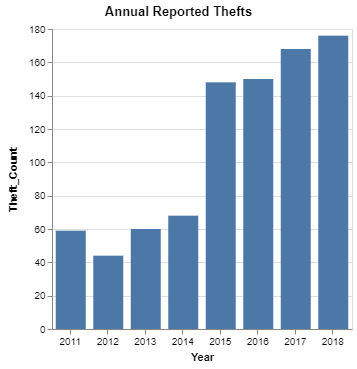

In [27]:
alt.Chart(annual_totals_df).configure_axis(labelAngle=0).mark_bar(size=30).encode(
    x=alt.X('Year:O'),
    y=alt.Y('Theft_Count')).properties(background='white', width=300, title='Annual Reported Thefts')

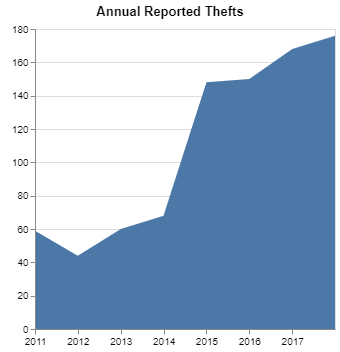

In [28]:
alt.Chart(annual_totals_df).configure_axis().mark_area().encode(
    x=alt.X('Year:T', title=None, axis=alt.Axis(labelFlush=False, grid=False)),
    y=alt.Y('Theft_Count', title=None)).properties(background='white', width=300, title='Annual Reported Thefts')

In [29]:
theft_addresses.Lon_Lat.value_counts()[:5]

POINT (-117.848312 33.669345)    21
POINT (-117.838483 33.670485)    10
POINT (-117.815726 33.692817)     6
POINT (-117.746 33.698141)        6
POINT (-117.773393 33.740223)     5
Name: Lon_Lat, dtype: int64

In [30]:
theft_addresses.Address.value_counts()[:5]

0 PALATINE, Irvine, CA           21
3300 MICHELSON DR, Irvine, CA    10
0 JUNEBERRY, Irvine, CA           6
0 NATURE, Irvine, CA              6
0 ELIZABETH LN, Irvine, CA        5
Name: Address, dtype: int64

---

Testing Plot on Irvine Image:

In [31]:
im = plt.imread('Irvine Map.jpg')

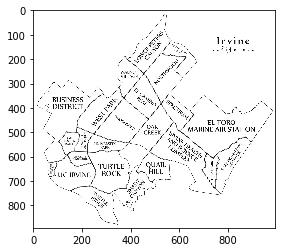

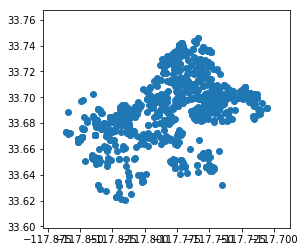

In [32]:
fig,ax = plt.subplots()
base = ax.imshow(im)
theft_addresses.plot()